# 导入依赖

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


# 装载训练数据

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 格式化训练数据

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 搭建神经网络
## 搭建卷积神经网络
模型的定义主要适用的keras.layers提供的`Conv2D`(卷积) 与 `MaxPooling2D`(池化)函数
CNN的输入是维度为(image_height, image_width, color_channels)的张亮
对于mnist数据集, 输入的张亮维度就是(28, 28, 1), 通过参数input_shape传给网络的第一层

In [5]:
model = Sequential()

# 第一层卷积, 卷积核大小为3*3, 32个, 第一层要输入训练图片的规模
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# 第二层卷积, 卷积核大小为3*3 64个
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

# 将三位张亮转换为一维向量, 展开前张亮的维度是(12,12,64), 转化为一维(9216)
model.add(Flatten())

# 使用Dense构建了2层全相连层, 逐步将一位向量的位数从9216变为128, 最终变为10
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# 最后一层的激活函数softmax, 10位恰好对应0~9十个数字
model.add(Dense(num_classes, activation='softmax'))

# 打印定义的模型结构
model.summary()

W0803 14:32:50.106833 4367869376 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 14:32:50.122762 4367869376 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 14:32:50.125011 4367869376 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 14:32:50.154793 4367869376 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:39

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## 编译模型

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W0803 14:33:22.323910 4367869376 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0803 14:33:22.332421 4367869376 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## 训练模型
每经过一层epoch, 模型训练遍历所有样本1次
batch_size设置为128, 即每次模型训练使用的样本数量为100
每经过一次epoch, 模型遍历训练集的60000歌样本, 每次训练使用128个样本, 即模型训练469次, 即损失函数经过469此批量梯度下降

In [7]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

W0803 14:33:32.021121 4367869376 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 49s 813us/step - loss: 0.2657 - acc: 0.9191 - val_loss: 0.0558 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 50s 830us/step - loss: 0.0863 - acc: 0.9751 - val_loss: 0.0402 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 53s 892us/step - loss: 0.0654 - acc: 0.9806 - val_loss: 0.0360 - val_acc: 0.9876
Epoch 4/12
60000/60000 [==============================] - 53s 890us/step - loss: 0.0547 - acc: 0.9833 - val_loss: 0.0306 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 52s 864us/step - loss: 0.0469 - acc: 0.9859 - val_loss: 0.0306 - val_acc: 0.9884
Epoch 6/12
60000/60000 [==============================] - 50s 834us/step - loss: 0.0425 - acc: 0.9872 - val_loss: 0.0289 - val_acc: 0.9900
Epoch 7/12
60000/60000 [==============================] - 51s 850us/step - loss: 0.0373 - acc: 0.9887 - val_loss: 0.

## 性能评估

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026224144125275232
Test accuracy: 0.9919


# 模型测试

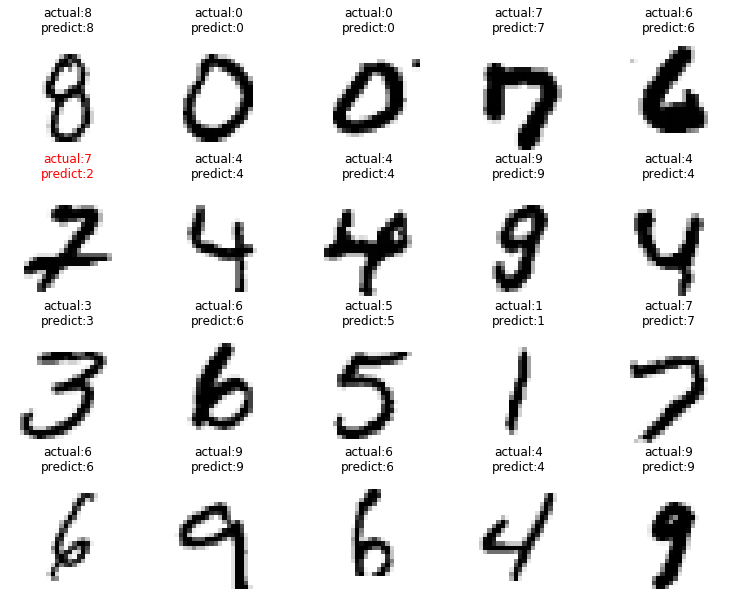

In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

'''画出单个数字'''
def drawDigit3(position, image, title, isTrue):
    plt.subplot(*position)    # 指定子图位置
    plt.imshow(image.reshape(-1, 28), cmap='gray_r')    # 把数字矩阵绘制成图
    plt.axis('off')    # 不显示坐标轴
    
    # 如果预测正确则标题为黑色, 否则为红色
    if not isTrue:
        plt.title(title, color='red')
    else:
        plt.title(title)
        
def batchDraw3(batch_size, test_X, test_y):
    selected_index = random.sample(range(len(test_y)), k=batch_size)
    images = test_X[selected_index]
    labels = test_y[selected_index]
    predict_labels = model.predict(images)
    image_number = images.shape[0]
    row_number = math.ceil(image_number ** 0.5)
    column_number = row_number
    plt.figure(figsize=(row_number+8, column_number+8))
    for i in range(row_number):
        for j in range(column_number):
            index = i * column_number + j
            if index < image_number:
                position = (row_number, column_number, index+1)
                image = images[index]
                actual = np.argmax(labels[index])
                predict = np.argmax(predict_labels[index])
                isTrue = actual==predict
                title = 'actual:%d\npredict:%d' %(actual,predict)
                drawDigit3(position, image, title, isTrue)

batchDraw3(20, x_test, y_test)
plt.show()